In [8]:
#libraries we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
pd.options.mode.chained_assignment = None
import h2o
from sklearn.model_selection import train_test_split
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

In [9]:
h2o.init(max_mem_size='24G', nthreads=4) # start h2o with plenty of memory and threads
h2o.remove_all()                         # clears h2o memory
h2o.no_progress()                        # turn off h2o progress indicators

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,36 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_vibhz_r9c7ub
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,21.32 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [10]:
#Import cleaned files 
train_df = pd.read_csv('./House-Prices-Data/new_train.csv')
test_df = pd.read_csv('./House-Prices-Data/new_test.csv').drop(['SalePrice'],axis=1)
#train_df.head(5)

train_num_df = train_df[[key for key in dict(train_df.dtypes) if dict(train_df.dtypes)[key] in ['float64', 'int64']]]

test_num_df = test_df[[key for key in dict(test_df.dtypes) if dict(test_df.dtypes)[key] in ['float64', 'int64']]]

In [11]:
response = 'SalePrice'
predictors = list(train_num_df.columns.values)

In [12]:
hf=h2o.H2OFrame(train_num_df)
gf=h2o.H2OFrame(test_num_df)

In [13]:
hf

MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,Age_House,Age_Renovation,Garage_age,TotalSF
10,65,8450,1,1,3,0,7,4,196,2,4,2,4,3,2,706,6,0,150,856,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,2,2,548,5,5,2,0,61,0,0,0,0,3,4,0,4,2,208500,17,17,17,2566
5,80,9600,1,1,3,0,6,7,0,3,4,2,4,1,0,978,6,0,284,1262,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,2,460,5,5,2,298,0,0,0,0,0,3,4,0,7,1,181500,44,44,44,2524
10,68,11250,1,1,0,0,7,4,162,2,4,2,4,2,2,486,6,0,434,920,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2,608,5,5,2,0,42,0,0,0,0,3,4,0,11,2,223500,19,18,19,2706
11,60,9550,1,1,0,0,7,4,0,3,4,4,1,3,0,216,6,0,540,756,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,3,3,642,5,5,2,0,35,272,0,0,0,3,4,0,4,0,140000,105,50,22,2473
10,84,14260,1,1,0,0,8,4,350,2,4,2,4,0,2,655,6,0,490,1145,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,3,836,5,5,2,192,84,0,0,0,0,3,4,0,3,2,250000,20,20,20,3343
9,85,14115,1,1,0,0,5,4,0,3,4,2,4,3,2,732,6,0,64,796,0,1,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,3,3,2,480,5,5,2,40,30,0,320,0,0,3,2,700,1,3,143000,27,25,27,2158
5,75,10084,1,1,3,0,8,4,186,2,4,0,4,0,2,1369,6,0,317,1686,0,1,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,2,2,636,5,5,2,255,57,0,0,0,0,3,4,0,10,1,307000,16,15,16,3380
10,87.18,10382,1,1,0,0,7,5,240,3,4,2,4,2,0,859,1,32,216,1107,0,1,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,5,2,2,484,5,5,2,235,204,228,0,0,0,3,4,350,2,3,200000,47,47,47,3197
9,51,6120,1,1,3,0,7,4,0,3,4,4,4,3,6,0,6,0,952,952,2,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,5,3,2,468,1,5,2,90,0,205,0,0,0,3,4,0,6,2,129900,89,70,89,2726
4,50,7420,1,1,3,0,5,5,0,3,4,4,4,3,2,851,6,0,140,991,0,1,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,5,2,1,205,2,5,2,0,4,0,0,0,0,3,4,0,0,2,118000,81,70,81,2068


In [22]:
hyper_params = {'alpha': [0, .25, .5, .75, .1]
                ,'lambda':[1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]
               }

glm = H2OGeneralizedLinearEstimator(family = 'gaussian',standardize = True,lambda_search = True)

# build grid search with previously made GLM and hyperparameters
grid = H2OGridSearch(model = glm, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})


grid.train(x = predictors, y = response, training_frame = hf,nfolds=5,seed=1)


In [23]:
sorted_grid = grid.get_grid(sort_by='RMSE', decreasing=False)
best_model = sorted_grid.models[0]
best_model.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,20019.707,1298.3903,22064.824,18918.045,18896.162,20294.871,19924.633
1,mean_residual_deviance,1.28539021E9,3.49272736E8,1.4776832E9,1.18287488E9,1.79428634E9,9.5214541E8,1.01996147E9
2,mse,1.28539021E9,3.49272736E8,1.4776832E9,1.18287488E9,1.79428634E9,9.5214541E8,1.01996147E9
3,null_deviance,1.84226152E12,2.70834991E11,2.2061714E12,1.58684388E12,1.77678608E12,1.60800283E12,2.0335037E12
4,r2,0.79335535,0.061788876,0.80104643,0.78603035,0.6940016,0.8289173,0.8567811
5,residual_deviance,3.77386533E11,1.12945766E11,4.38871917E11,3.39485065E11,5.43668765E11,2.74217878E11,2.90689024E11
6,rmse,35597.258,4773.016,38440.645,34392.945,42359.016,30856.854,31936.836
7,rmsle,0.15422444,0.009988594,0.16284959,0.13941681,0.16043614,0.15999098,0.14842866


In [24]:
pred =  best_model.predict(gf)


In [25]:
pred

predict
112957
159667
178799
202000
195490
175771
187292
172842
188146
115078


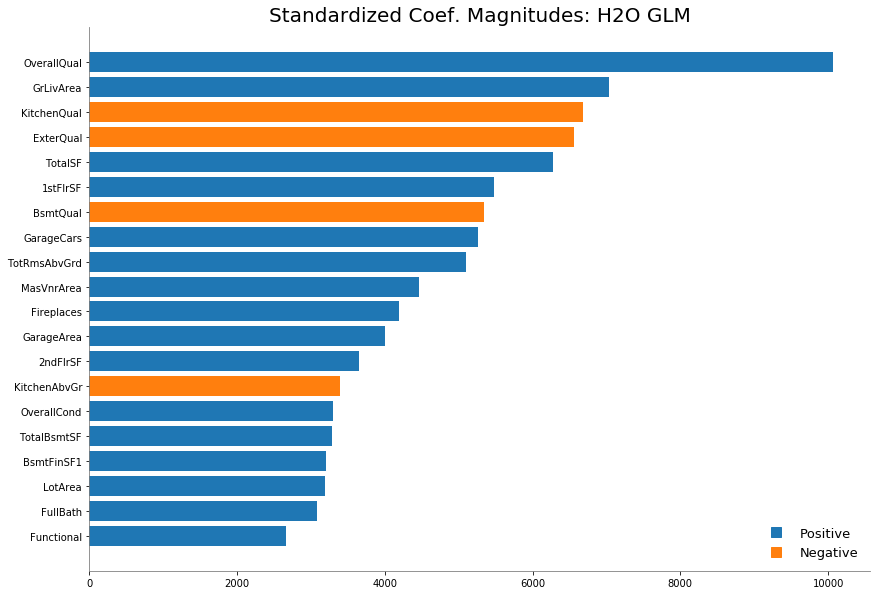

In [33]:
#COEFFICIENTS PLOT
#We can change the number of features
best_model.std_coef_plot(num_of_features = 20)